Epoch 1/100


C:\Users\Immanuel jayaruban\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2728
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2401 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1991 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1725 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1482 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1050 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0677 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0266 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0224 
Epoch 16/100
4/4 ━━━━━━━━━━━━━━

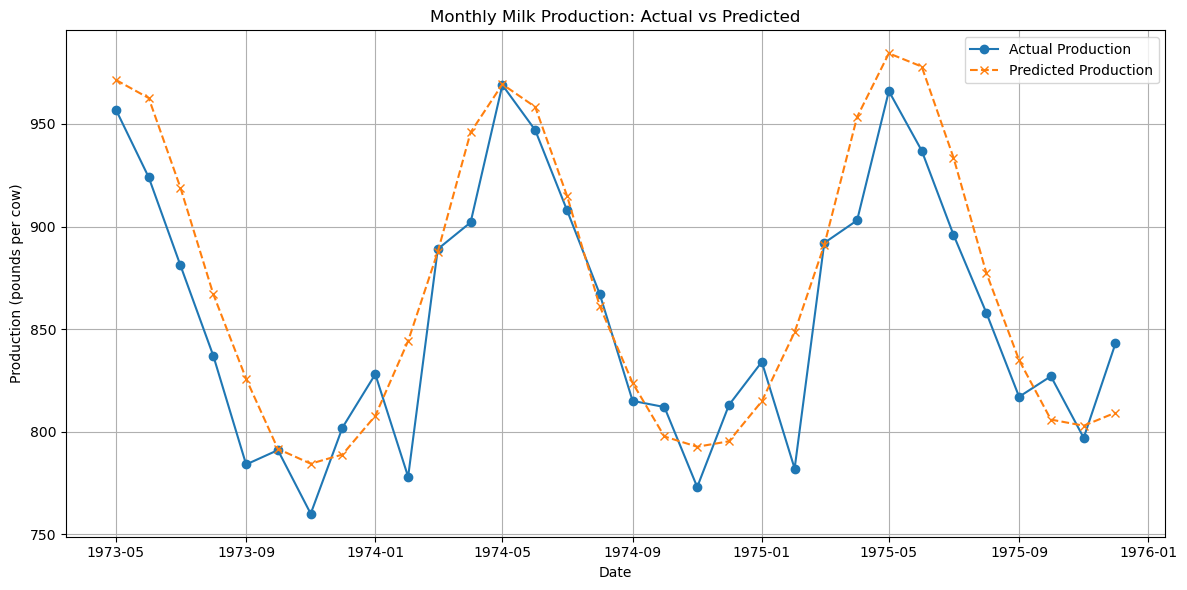

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv("C://Users//Immanuel jayaruban//Downloads//monthlyMilkProduction.csv")

# Remove any row where 'Month' is not in 'YYYY-MM' format (remove footer/comment)
df = df[df['Month'].str.match(r'^\d{4}-\d{2}$')]

# Convert 'Month' column to datetime and set it as index
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.sort_values('Month', inplace=True)
df.set_index('Month', inplace=True)
df.columns = ['Production']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
production_scaled = scaler.fit_transform(df['Production'].values.reshape(-1, 1))

# Function to create input sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Using past 12 months to predict next month
X, y = create_sequences(production_scaled, seq_length)

# Split the dataset into train and test sets (80%-20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to 3D format for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform to get actual production values
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted production values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_actual, label='Actual Production', marker='o')
plt.plot(df.index[-len(y_test):], predictions_actual, label='Predicted Production', marker='x', linestyle='--')
plt.title('Monthly Milk Production: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Production (pounds per cow)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()